# **Which technology usage patterns have the strongest impact on mental health?**



## **1. Data Acquisition** 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv_file = "../data/mental_health_and_technology_usage_2024.csv"
csv_data = pd.read_csv(csv_file)

# Display the first few rows of the dataframe to understand its structure
csv_data.head()


,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


## **Data Preparation/Data Cleaning** 


### **Missing Values:** 

In [3]:
print("\nMissing values check: \n")
missing_val = csv_data.isnull().sum()
if missing_val.sum()== 0:
    print("no missing values found")
else:
    print("name of the column and the number of values missing:")
    print(missing_val[missing_val>0])


Missing values check: 

no missing values found


### **Different Format:**
 

In [4]:
print("\nData formatting check per column: ")
issue=False
for column in csv_data.columns:
        if csv_data[column].apply(type).nunique()>1:
            print(f"Mixed data types in column '{column}'")
            issue = True
            
if not issue:
        print("no issues with formatting")


Data formatting check per column: 
no issues with formatting


### **Errors: Case sensitive**
**Note:** There are no case sensitive errors in the whole dataset.


#### **Gender**


In [5]:
print(csv_data["Gender"].unique())

valid_values = ["Male", "Female", "Other"]
invalid_entries = csv_data[~csv_data["Gender"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Gender"].head())


['Female' 'Male' 'Other']
Case-sensitive invalid entries:
Series([], Name: Gender, dtype: object)


#### **Mental health status**

In [6]:
print(csv_data["Mental_Health_Status"].unique())

valid_values = ["Good", "Poor", "Fair", "Excellent"]
invalid_entries = csv_data[~csv_data["Mental_Health_Status"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Mental_Health_Status"].head())


['Good' 'Poor' 'Fair' 'Excellent']
Case-sensitive invalid entries:
Series([], Name: Mental_Health_Status, dtype: object)


#### **Stress level**

In [7]:
print(csv_data["Stress_Level"].unique())

valid_values = ["Low", "High", "Medium"]
invalid_entries = csv_data[~csv_data["Stress_Level"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Stress_Level"].head())

['Low' 'High' 'Medium']
Case-sensitive invalid entries:
Series([], Name: Stress_Level, dtype: object)


#### **Support systems access**

In [8]:
print(csv_data["Support_Systems_Access"].unique())

valid_values = ["No", "Yes"]
invalid_entries = csv_data[~csv_data["Support_Systems_Access"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Support_Systems_Access"].head())

['No' 'Yes']
Case-sensitive invalid entries:
Series([], Name: Support_Systems_Access, dtype: object)


#### **Work environment impact**

In [9]:
print(csv_data["Work_Environment_Impact"].unique())

valid_values = ["Negative", "Positive", "Neutral"]
invalid_entries = csv_data[~csv_data["Work_Environment_Impact"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Work_Environment_Impact"].head())

['Negative' 'Positive' 'Neutral']
Case-sensitive invalid entries:
Series([], Name: Work_Environment_Impact, dtype: object)


#### **Online support usage**

In [10]:
print(csv_data["Online_Support_Usage"].unique())

valid_values = ["No", "Yes"]
invalid_entries = csv_data[~csv_data["Online_Support_Usage"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Online_Support_Usage"].head())

['Yes' 'No']
Case-sensitive invalid entries:
Series([], Name: Online_Support_Usage, dtype: object)


### **Remove duplicates in identifiers**
**Note:** There are no duplicates in the User_ID column.

In [11]:
is_unique = csv_data["User_ID"].is_unique
print("Are all User_IDs unique?", is_unique)


Are all User_IDs unique? True


### **Outliers:**
**Note:** The IQR factor was intentionally reduced to 0.4 to identify even slight deviations from the central range as outliers. This allows for a more sensitive analysis. These are not classical outliers (which use a factor of 1.5), but rather borderline observations.


Outliers in 'Technology_Usage_Hours':
      Technology_Usage_Hours
4                       1.20
22                      1.27
27                      1.16
31                     11.80
32                     11.51
...                      ...
9956                   11.50
9962                   11.73
9967                    1.43
9977                    1.19
9993                   11.58

[1085 rows x 1 columns]

Outliers in 'Social_Media_Usage_Hours':
      Social_Media_Usage_Hours
15                        0.21
26                        0.06
54                        7.83
55                        7.78
79                        0.37
...                        ...
9943                      7.64
9950                      7.64
9954                      0.05
9964                      7.86
9974                      0.32

[970 rows x 1 columns]

Outliers in 'Gaming_Hours':
      Gaming_Hours
5             0.11
8             0.08
25            0.19
47            4.85
78            4.94
...     

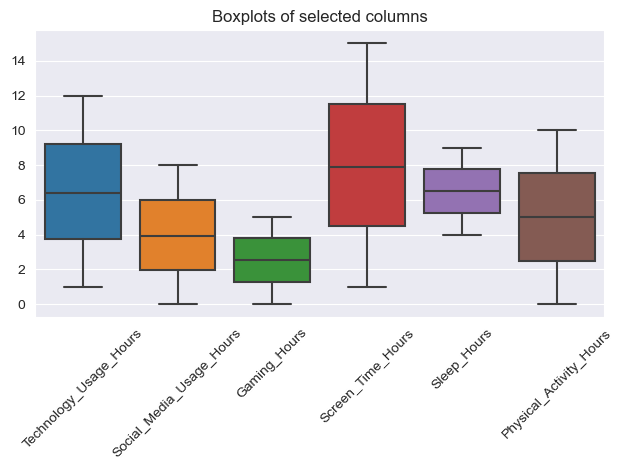

In [13]:
columns = [
    "Technology_Usage_Hours",
    "Social_Media_Usage_Hours",
    "Gaming_Hours",
    "Screen_Time_Hours",
    "Sleep_Hours",
    "Physical_Activity_Hours"
]

# copy of the data frame
clean_data = csv_data.copy()

for col in columns:
    # calculate IQR
    Q1 = csv_data[col].quantile(0.25)
    Q3 = csv_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # calculate borders
    lower_bound = Q1 - 0.4 * IQR
    upper_bound = Q3 + 0.4 * IQR

    # select and print outliers
    outliers = csv_data[(csv_data[col] < lower_bound) | (csv_data[col] > upper_bound)]
    print(f"\nOutliers in '{col}':")
    print(outliers[[col]])
  
# Boxplots for all chosen columns
sns.boxplot(data=csv_data[columns])
plt.title("Boxplots of selected columns")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


#### **Analysis:**
1. The values are presented in hours and the range is 0-14 hours
2. "Gaming hours" and "sleep hours" have the lowest value range 
3. the column "Screen time hours" has the biggest value range
4. There are no classical outliers, but rather border observations


## **Explorative Analysis** 

### **Visualize Data** 

### **Correlations**

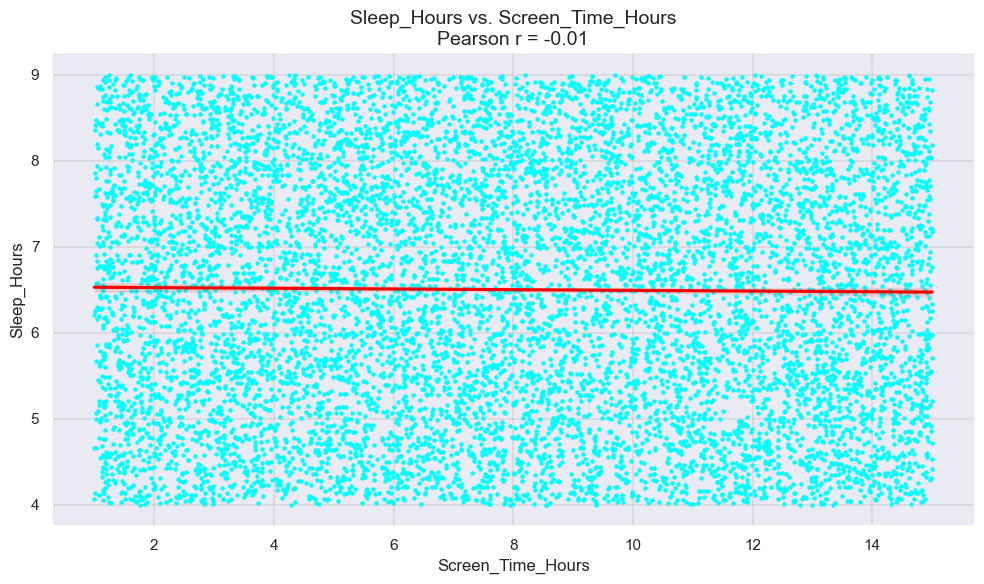

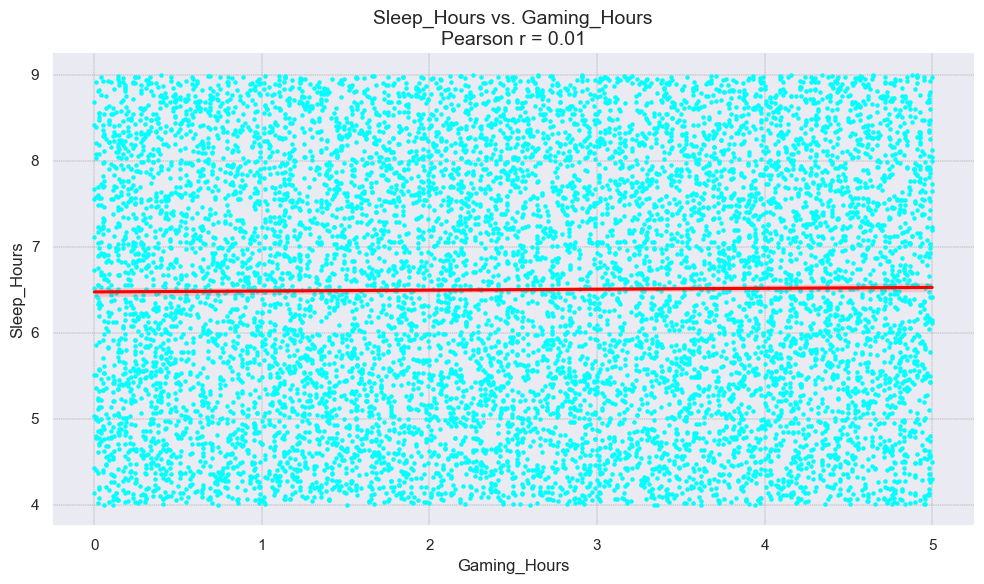

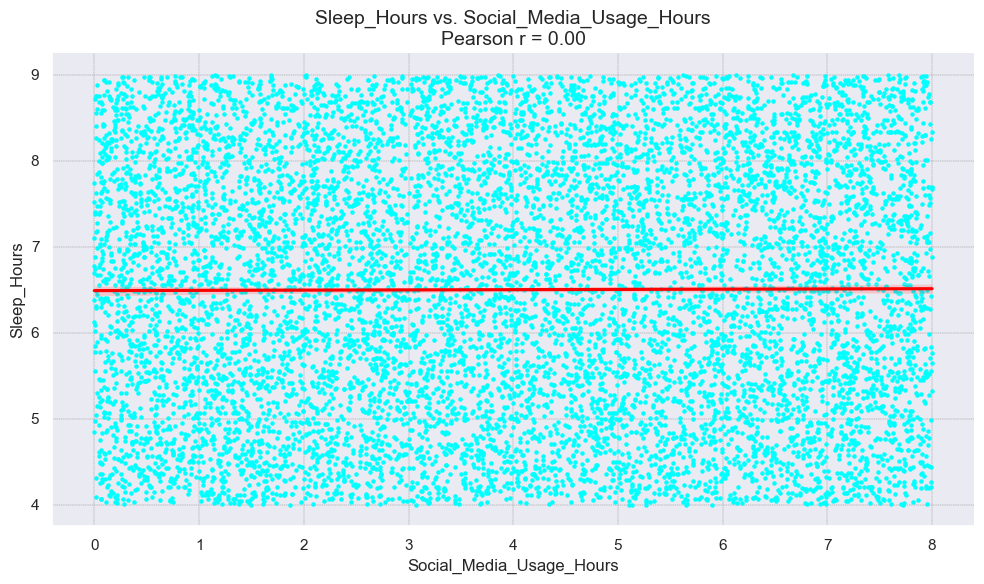

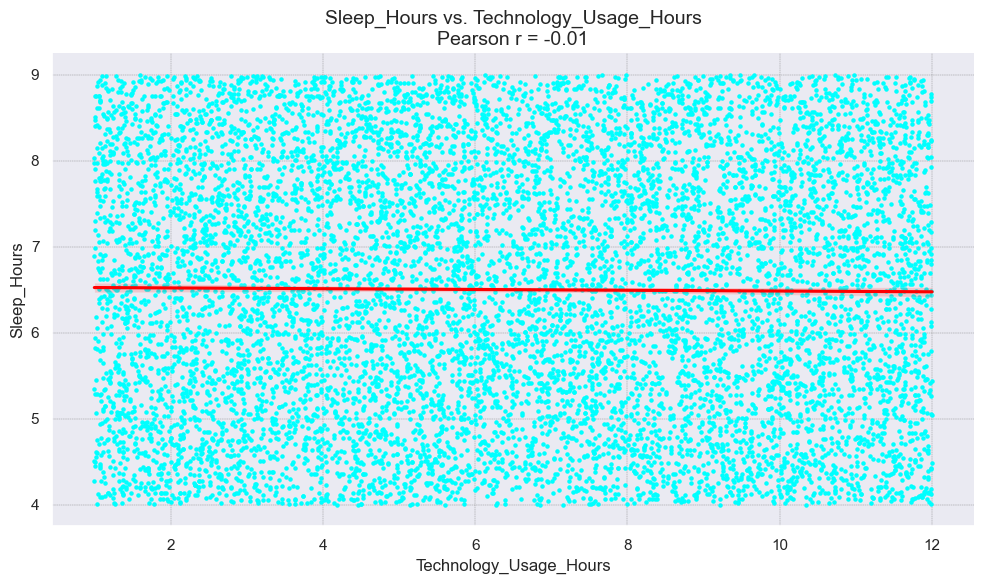

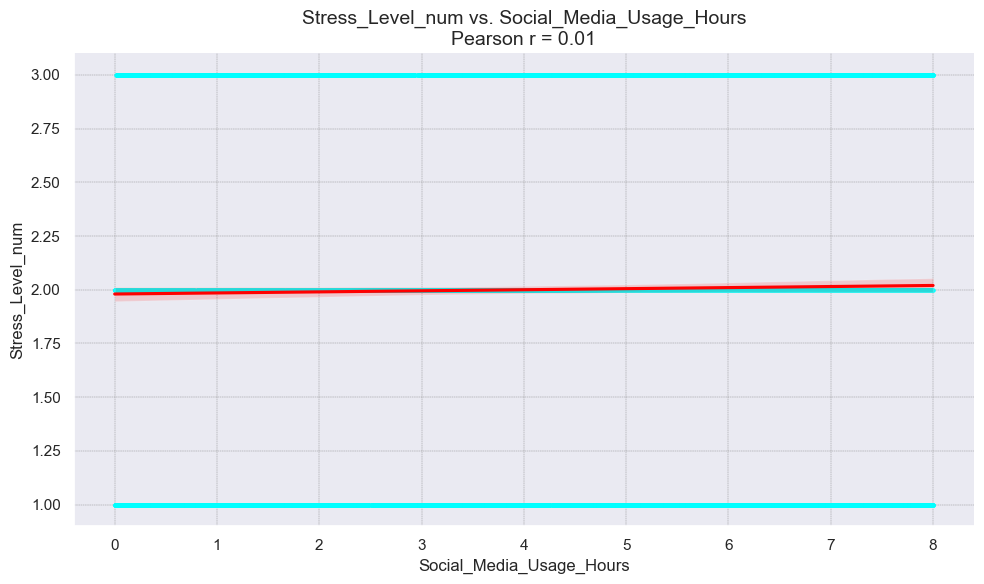

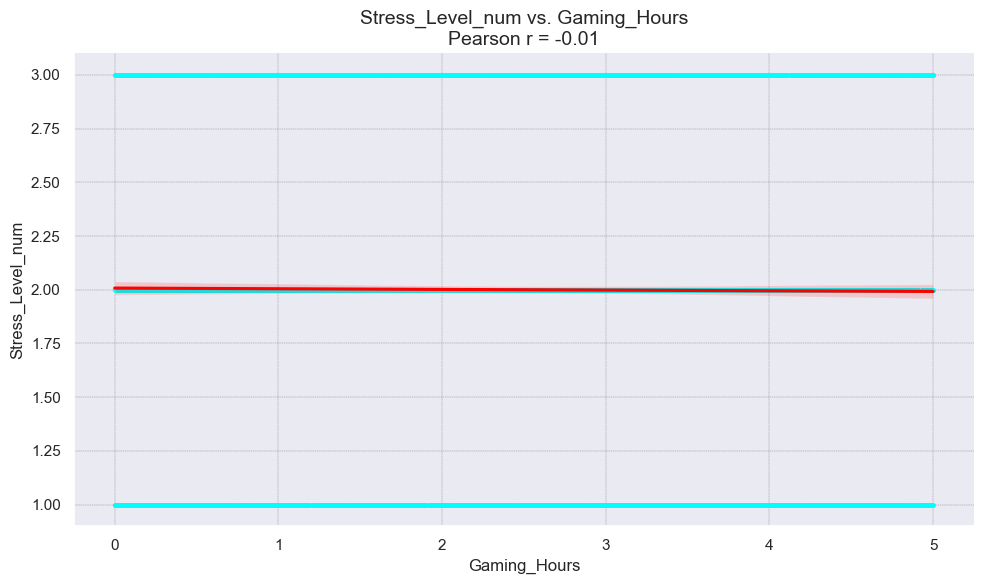

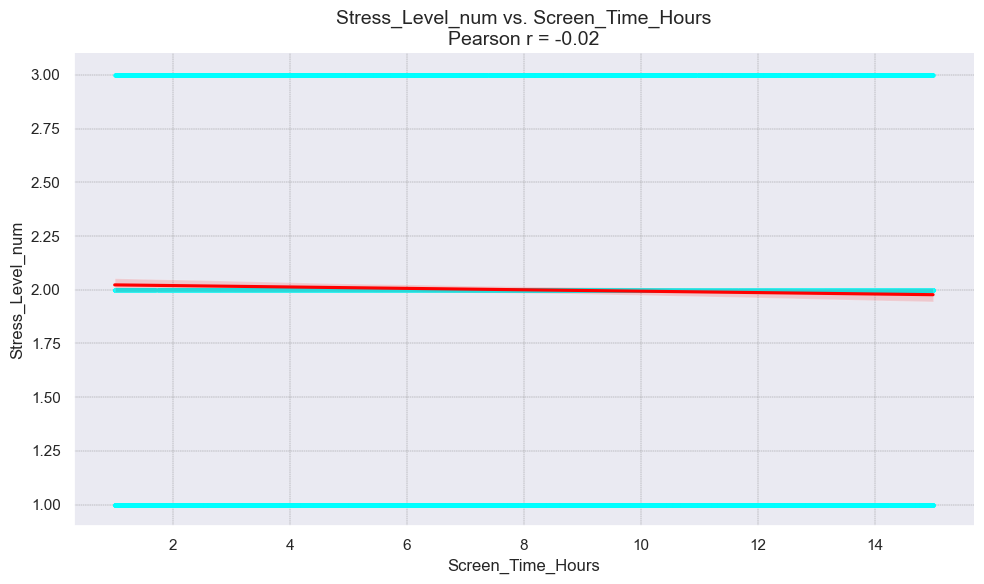

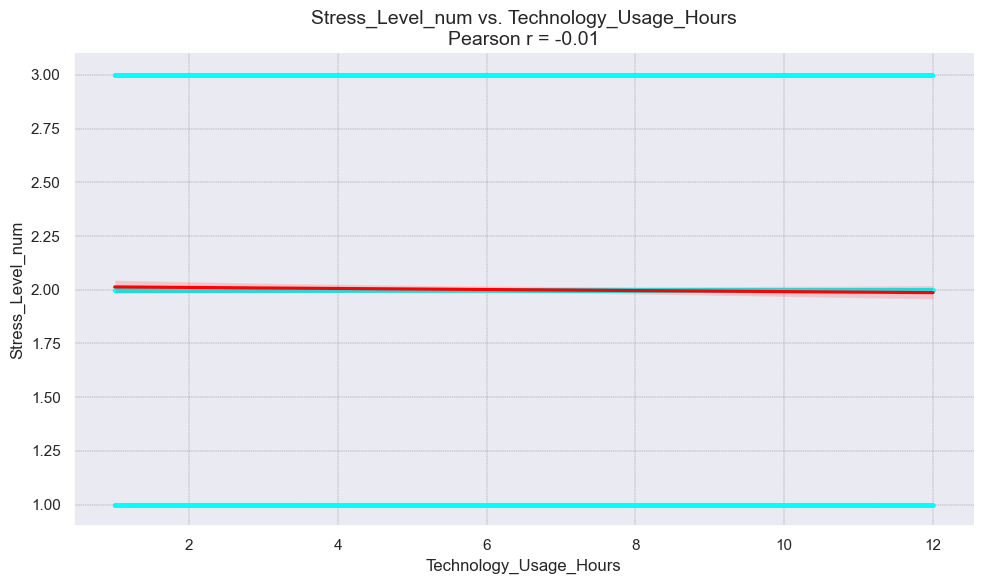

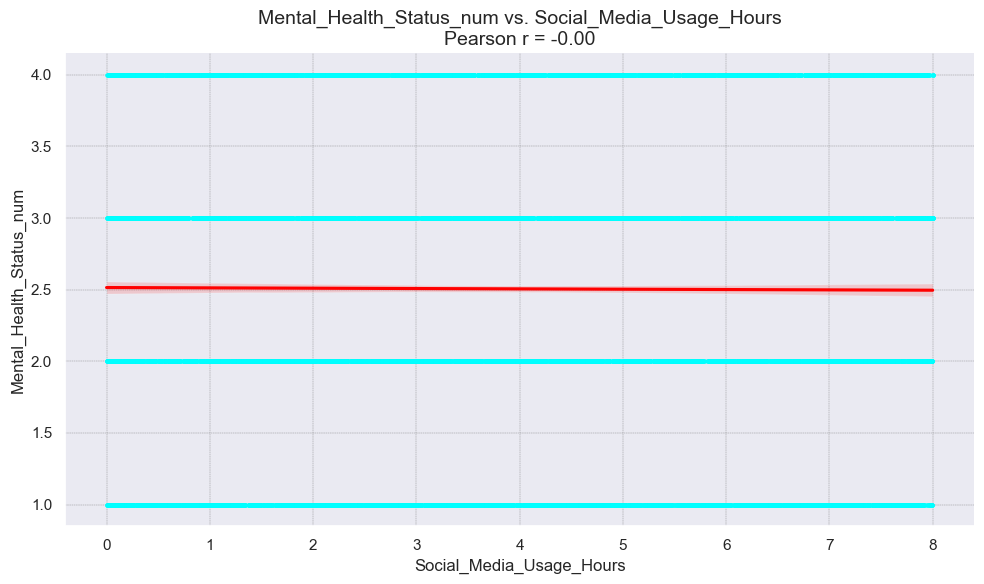

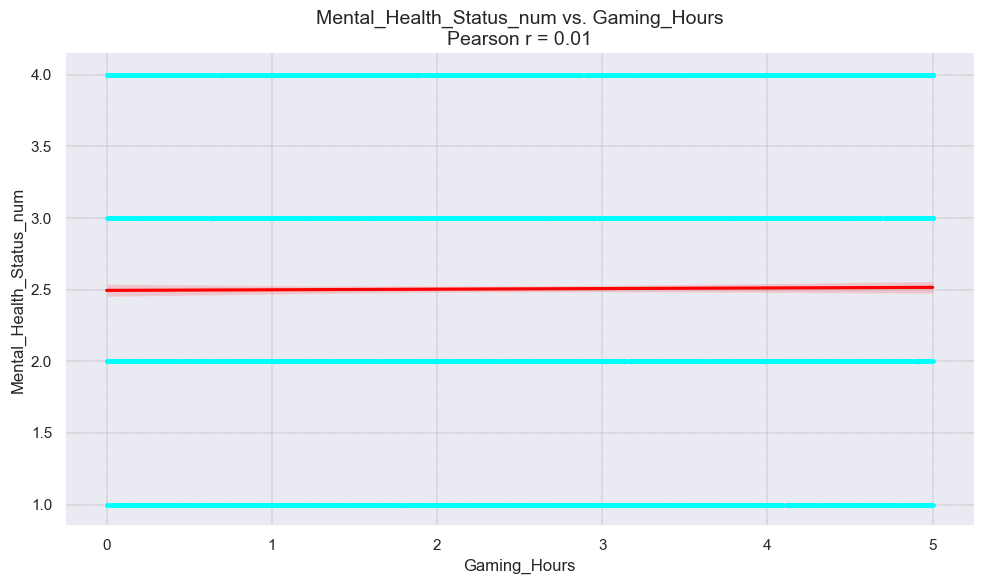

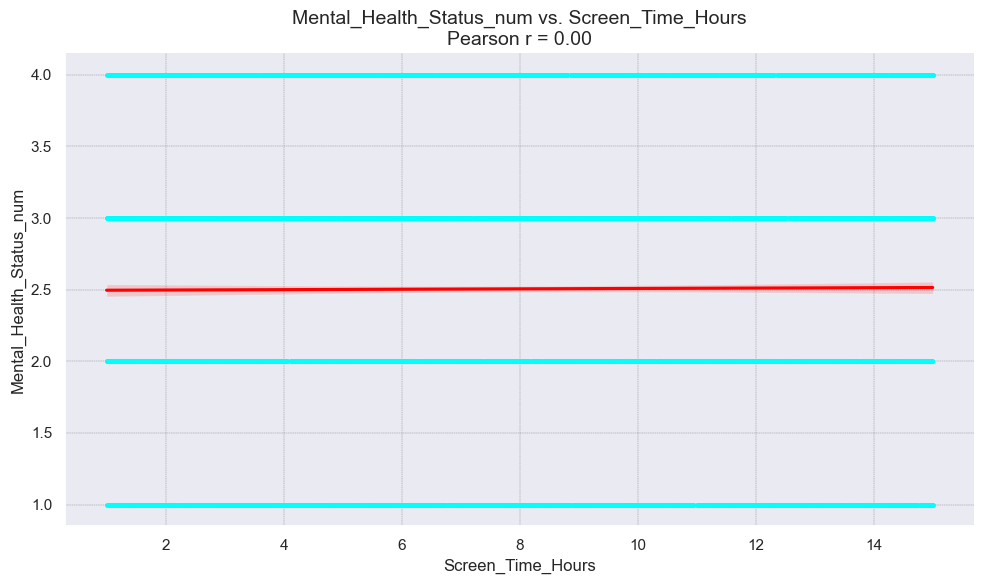

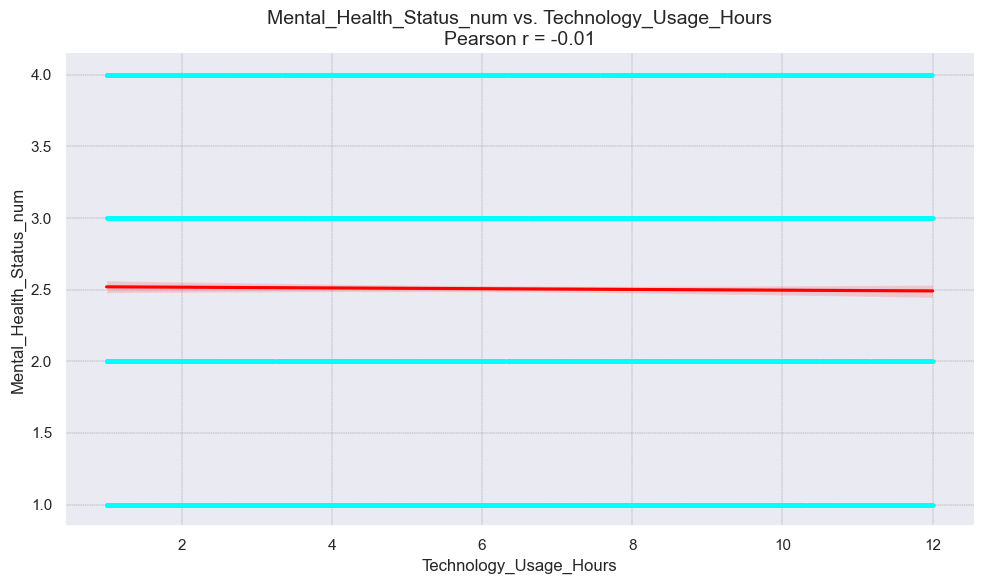

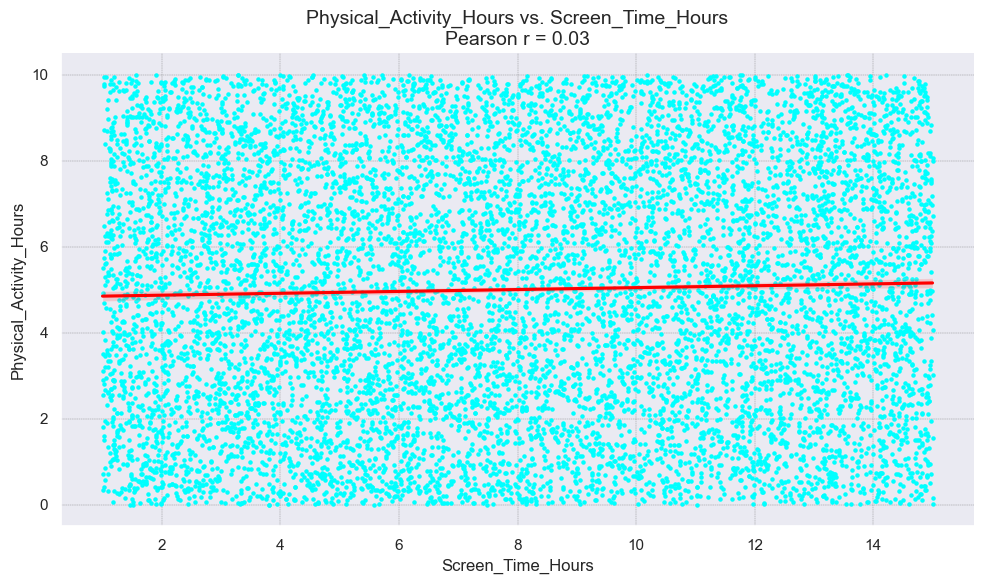

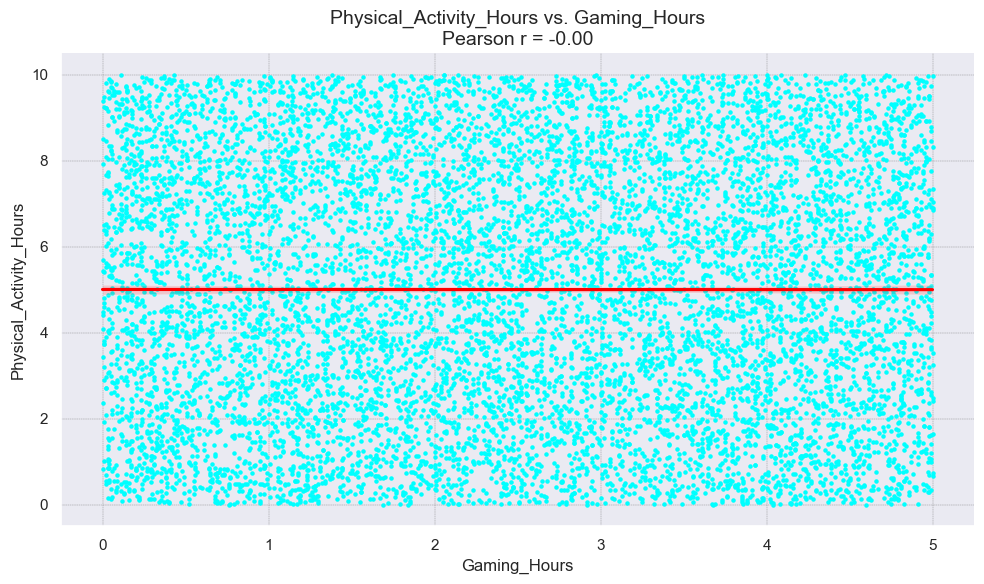

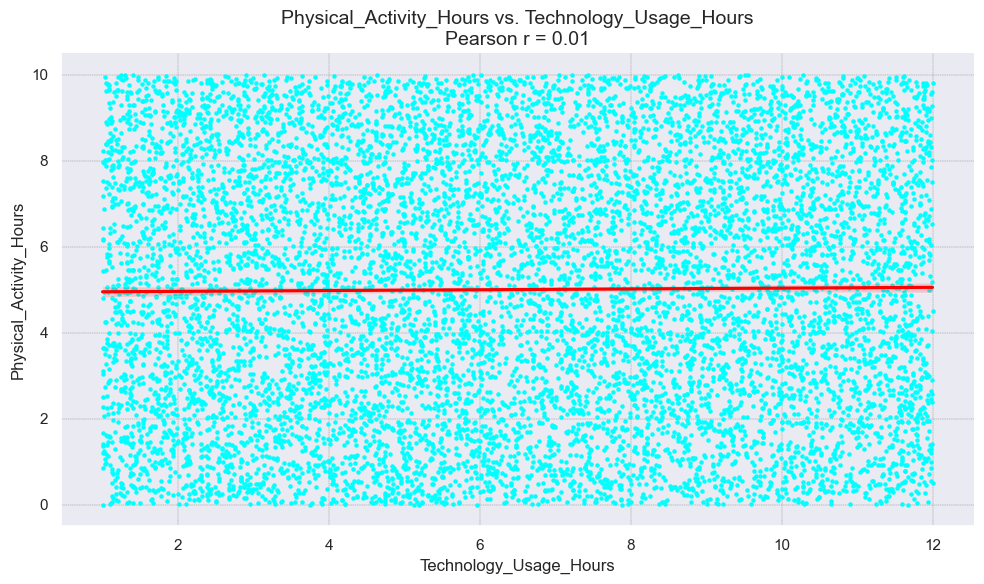

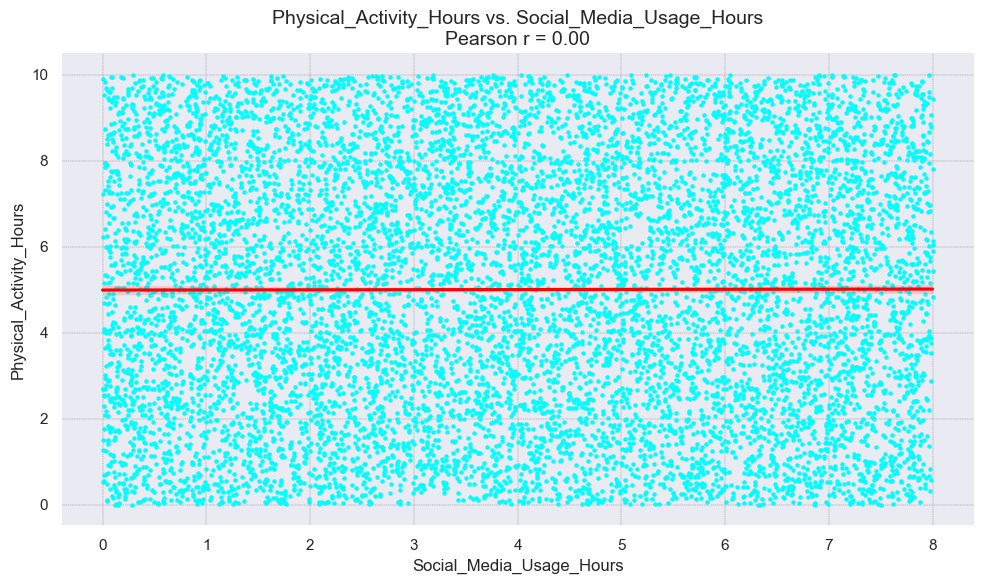

In [28]:
# Create a copy of the original dataset 
data = csv_data.copy()

# Map categorical variables to numerical values for easier analysis
data['Stress_Level_num'] = data['Stress_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Mental_Health_Status_num'] = data['Mental_Health_Status'].map({'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4})
data['Support_Systems_Access_num'] = data['Support_Systems_Access'].map({'Yes': 1, 'No': 0})
data['Online_Support_Usage_num'] = data['Online_Support_Usage'].map({'Yes': 1, 'No': 0})
data['work_environment_impact_num'] = data['Work_Environment_Impact'].map({'Negative': 1, 'Neutral': 2, 'Positive': 3})

# Define the pairs of variables to analyze the correlation between
correlation_pairs = [
    ('Sleep_Hours', 'Screen_Time_Hours'),
    ('Sleep_Hours', 'Gaming_Hours'),
    ('Sleep_Hours', 'Social_Media_Usage_Hours'),
    ('Sleep_Hours', 'Technology_Usage_Hours'),
    ('Stress_Level_num', 'Social_Media_Usage_Hours'),
    ('Stress_Level_num', 'Gaming_Hours'),
    ('Stress_Level_num', 'Screen_Time_Hours'),
    ('Stress_Level_num', 'Technology_Usage_Hours'),
    ('Mental_Health_Status_num', 'Social_Media_Usage_Hours'),
    ('Mental_Health_Status_num', 'Gaming_Hours'),
    ('Mental_Health_Status_num', 'Screen_Time_Hours'),
    ('Mental_Health_Status_num', 'Technology_Usage_Hours'),
    ('Physical_Activity_Hours', 'Screen_Time_Hours'),
    ('Physical_Activity_Hours', 'Gaming_Hours'),
    ('Physical_Activity_Hours', 'Technology_Usage_Hours'),
    ('Physical_Activity_Hours', 'Social_Media_Usage_Hours')
]

# Iterate through each pair of variables and create scatter plots with regression lines
for y_var, x_var in correlation_pairs:
    plt.figure(figsize=(10, 6), facecolor='white')  

    # Calculate the Pearson correlation coefficient 
    correlation = data[[y_var, x_var]].corr().iloc[0, 1]

    # Create a scatter plot with a regression line
    sns.regplot(
        data=data,
        x=x_var,  
        y=y_var,  
        scatter_kws={'alpha': 1.0, 's': 5, 'color': 'cyan'},  
        line_kws={'color': 'red'}  
    )

    # Add title to the plot, including the correlation coefficient
    plt.title(f"{y_var} vs. {x_var}\nPearson r = {correlation:.2f}", fontsize=14)
    
    # Label the axes
    plt.xlabel(x_var)
    plt.ylabel(y_var)

    # Add grid lines to the plot for better readability
    plt.grid(True, color='gray', linestyle='--', linewidth=0.3)  
    sns.despine()  

    # Adjust layout to avoid overlap and display the plot
    plt.tight_layout()
    plt.show()



#### **Analysis:** 
1. The highest correlation is between Screen Time Hours and Physical Activity Hours(r=0,03)
2. The lowest correlation is between Physical Activity Hours and Social Media Usage Hours, Physical Activity Hours and Gaming Hours, Mental Health Status and Screen Time Hours, Mental Health Status and Social Media Usage Hours, Social Media Usage Hours and Sleep Hours(r=0,00)
3. A correlation coefficient of 0.03 indicates a very weak linear relationship between the variables, suggesting that there is almost no linear association between them.